Machine Learning (S1-23_AIMLCZG565)

Academic Year 2023-2024

# **Assignment 1 : Financial Transaction Analysis**

# **ML Group 20**

# Contribution
1.   **Hemant Kumar Parakh** (2023AA05741)
2.   **Sushil Kumar** (2023aa05849)

Dataset Name - Financial Transaction Dataset

Dataset CSV - Assignment 1 Set 1 Dataset.csv


**Problem Statement**

Financial institutions face the constant challenge of detecting fraudulent transactions amidst legitimate ones. Early identification and prevention of such fraudulent activities are crucial for minimizing financial losses and protecting customer trust. The objective is to develop a mathematical model to identify risky transactions using the available features of the 'Financial Transactions' dataset.

## Dataset - Financial Transaction Analysis

1. This is the demonstate to identify and report risky transcations
2. Dataset is not having sufficaint information to come to any concludsion
3. For modelling different build models are used as mentioned into assignment's problem statement, and compared
4. Naming convention in data set self explanatory

# Conneting to Google Drive. I have copied the dataset on google drive for easy access.

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the necessary libraries and overview of the dataset

In [61]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


## Loading the data

We are ignoring first column which is sr. no. Also column header is missing

In [62]:
try:
  df = pd.read_csv('sample_data/Assignment 1 Set 1 Dataset.csv',index_col=0)
except:
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-Assignment-1/Assignment_1_Set_1_Dataset.csv',index_col=0)

a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [63]:
df.head(2)

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,180.924993,2023-07-02,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,Average,6,828.820298,Medium,0
1,794.625797,2023-02-18,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,Average,13,4384.528307,Low,1


## Exploratory Data Analysis

## Shape of the data

Check the number of rows and columns and provide observations.

In [64]:
# Check the number of rows and columns and provide observations
rows, columns = df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  1000
No of columns:  19


The dataset is composed of 1000 rows and 19 columns, implying there are 1000 individual data entries. Each entry pertains to user transactions, and the dataset's columns include 'Amount',	'Date',	'Card Type',	'MCC Category',	'Location',	'Device',	'Previous Transactions',	'Balance Before Transaction',	'Time of Day',	'Velocity',	'Customer Age',	'Customer Income',	'Card Limit',	'Credit Score',	'Merchant Reputation',	'Merchant Location History',	'Spending Patterns',	'Online Transactions Frequency',	and 'Is Fraudulent' which respectively represent information about the of the user payment and related data of the transaction.
The Data is not large. Its easy to work on this by computational and train the models.

## Data Visualization and Exploration



In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   fl

## Observations:

From the Data Frame information, Here are few observations.

1. The DataFrame contains 1000 entries and 20 columns.

2. There are no missing values (non-null count is 1000 for all columns), which is good for analysis.

3. The columns have different data types:
  - There are 6 columns with float64 data type.
  - There are 7 columns with int64 data type.
  - There are 7 columns with object data type (likely categorical variables).
4. The column names provide information about various features related to transactions, such as amount, date, card type, location, device, customer information, merchant details, and whether the transaction is fraudulent (Is Fraudulent).
5. Some columns seem to contain categorical variables (Card Type, MCC Category, Location, Device, Merchant Reputation, Online Transactions Frequency). These may need to be encoded for analysis.
6. The target calss variable for classification, 'Is Fraudulent' is of integer type and contains binary labels (0 and 1) indicating whether a transaction is fraudulent.

## class imbalance with visualization method - Class Balance plot with **Pie plot**

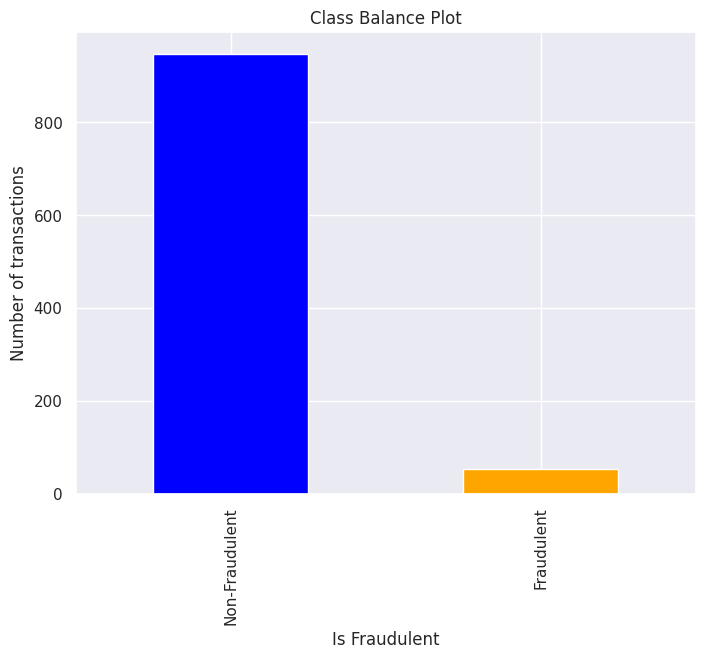

In [66]:
labels=['Non-Fraudulent', 'Fraudulent']

fraud_or_not = df["Is Fraudulent"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Is Fraudulent'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["blue","orange"]
             ,title="Fraud vs Genuine transactions")
fig.show()


# Calculate class counts
class_counts = df['Is Fraudulent'].value_counts()

# Plot Class Balance
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Is Fraudulent')
plt.ylabel('Number of transactions')
plt.title('Class Balance Plot')
plt.xticks(range(len(class_counts)), ['Non-Fraudulent', 'Fraudulent'])
plt.show()


The fraudulent cases are very less (only around 5%) and mojority of cases are non-Fraudlent cases (around 95%). The data set has highly imbalance data.

Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

Make a copy of dataset to perform feature engineering.

In [67]:
newdf = df.copy()
newdf.head()

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,180.924993,2023-07-02,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,Average,6,828.820298,Medium,0
1,794.625797,2023-02-18,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,Average,13,4384.528307,Low,1
2,818.413303,2023-01-02,Prepaid,Electronics,UK,POS,5,6578.889931,4,-0.198457,42,90579.479280,2039.105869,323,Good,1,733.282224,High,0
3,530.306522,2023-03-21,Credit,Restaurants,US,Mobile,3,8036.856328,20,-0.076741,76,63777.184316,5568.880208,674,Bad,1,670.074148,High,0
4,649.101853,2023-08-28,Debit,Electronics,Canada,Desktop,4,5342.795887,16,-0.029077,39,30620.998085,6945.439545,533,Good,3,550.619875,Low,0


## Data Pre-processing and cleaning

Checking if the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters

Check if any duplicate rows exist

In [68]:
#Check duplicate rows in data
duplicate_rows = newdf[newdf.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 19)


There are no duplicate rows exist in the data set.

Checking if any missing items or null values in dataset

In [69]:
#looking for null values
print("Null values :: ")
print(newdf.isnull().sum())

Null values :: 
Amount                           0
Date                             0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
dtype: int64


There are no missing/null values available in the data set.





## Feature Enginerring

There are few categorical data like Merchant Reputation, Online Transactions Frequency. We should apply Ordinal Encoding to these features.
We are also keeping it as ordered i.e 'Bad': 0, 'Average': 1, 'Good': 2

In [70]:
newdf['Merchant Reputation'] = newdf['Merchant Reputation'].astype('category')

# Define the desired order of categories
reputation_order = {'Bad': 0, 'Average': 1, 'Good': 2}

newdf['Merchant Reputation'] = pd.Categorical(newdf['Merchant Reputation'], categories=reputation_order, ordered=True)
newdf['Merchant Reputation'] = newdf['Merchant Reputation'].cat.codes

In [71]:
newdf['Online Transactions Frequency'] = newdf['Online Transactions Frequency'].astype('category')

# Define the order of categories
reputation_order_OTF = {'Low': 0, 'Medium': 1, 'High': 2}

newdf['Online Transactions Frequency'] = pd.Categorical(newdf['Online Transactions Frequency'], categories=reputation_order_OTF, ordered=True)
newdf['Online Transactions Frequency'] = newdf['Online Transactions Frequency'].cat.codes

In [72]:
newdf.head()

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,180.924993,2023-07-02,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,1,6,828.820298,1,0
1,794.625797,2023-02-18,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,1,13,4384.528307,0,1
2,818.413303,2023-01-02,Prepaid,Electronics,UK,POS,5,6578.889931,4,-0.198457,42,90579.479280,2039.105869,323,2,1,733.282224,2,0
3,530.306522,2023-03-21,Credit,Restaurants,US,Mobile,3,8036.856328,20,-0.076741,76,63777.184316,5568.880208,674,0,1,670.074148,2,0
4,649.101853,2023-08-28,Debit,Electronics,Canada,Desktop,4,5342.795887,16,-0.029077,39,30620.998085,6945.439545,533,2,3,550.619875,0,0


dataset with tranformed features

In [73]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   fl

There are few other categorical features like Card Type, MCC Category,Location, Device which are nominal data. We should apply one hot encoding.

In [74]:
fe_df = pd.get_dummies(newdf, columns=['Card Type','MCC Category','Location', 'Device'])

fe_df.head()

,Amount,Date,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,...,MCC Category_Restaurants,MCC Category_Travel,Location_Canada,Location_France,Location_Germany,Location_UK,Location_US,Device_Desktop,Device_Mobile,Device_POS
0,180.924993,2023-07-02,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,...,0,0,0,0,0,1,0,1,0,0
1,794.625797,2023-02-18,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,...,0,0,1,0,0,0,0,1,0,0
2,818.413303,2023-01-02,5,6578.889931,4,-0.198457,42,90579.479280,2039.105869,323,...,0,0,0,0,0,1,0,0,0,1
3,530.306522,2023-03-21,3,8036.856328,20,-0.076741,76,63777.184316,5568.880208,674,...,1,0,0,0,0,0,1,0,1,0
4,649.101853,2023-08-28,4,5342.795887,16,-0.029077,39,30620.998085,6945.439545,533,...,0,0,1,0,0,0,0,1,0,0


By applying one hot encoding, the number of featurs are increased. This is know as **curse of dimensionality**. This comes with more comlexities in terms of computational, and increase model complexity. This also increase the data visualization challenges. In next step we need to drop some of the features for training the model based on feature correlation.

But we dont have huge number of featues and data set is very small. We need not to drop any features due to cruse of dimensionality.

We have another feauture which is not in the numerical format which is Date. We need to convert it into day, month and year features.

In [75]:
fe_df['Date'] = pd.to_datetime(fe_df['Date'], dayfirst=False)
fe_df['Year'] = fe_df['Date'].dt.year
fe_df['Month'] = fe_df['Date'].dt.month
fe_df['Day'] = fe_df['Date'].dt.day
fe_df.drop(columns=['Date'], inplace=True)

We should apply scalling with all the numerical features to make sure we dont have any negative values.

In [76]:
# Scaling numerical features to ensure they are non-negative
numerical_features = fe_df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
fe_df[numerical_features] = scaler.fit_transform(fe_df[numerical_features])

Check the dataset with all the transformed features.

Now we dont have any features with type text or object. All the features are tarnsformed into numerical data type.

In [77]:
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Previous Transactions          1000 non-null   float64
 2   Balance Before Transaction     1000 non-null   float64
 3   Time of Day                    1000 non-null   float64
 4   Velocity                       1000 non-null   float64
 5   Customer Age                   1000 non-null   float64
 6   Customer Income                1000 non-null   float64
 7   Card Limit                     1000 non-null   float64
 8   Credit Score                   1000 non-null   float64
 9   Merchant Reputation            1000 non-null   int8   
 10  Merchant Location History      1000 non-null   float64
 11  Spending Patterns              1000 non-null   float64
 12  Online Transactions Frequency  1000 non-null   in

'**Year**' has only value "2023' Lets drop this feature

In [78]:
fe_df = fe_df.drop(['Year'], axis=1)

In [79]:
fe_df.head()

,Amount,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,...,Location_Canada,Location_France,Location_Germany,Location_UK,Location_US,Device_Desktop,Device_Mobile,Device_POS,Month,Day
0,0.172848,0.666667,0.080751,0.434783,0.161963,0.542373,0.658346,0.101629,0.183971,1,...,0,0,0,1,0,1,0,0,0.545455,0.033333
1,0.795115,0.555556,0.345750,0.739130,0.515093,0.711864,0.559021,0.635362,0.198543,1,...,1,0,0,0,0,1,0,0,0.090909,0.566667
2,0.819235,0.555556,0.655214,0.173913,0.301484,0.372881,0.543057,0.077742,0.041894,2,...,0,0,0,1,0,0,0,1,0.000000,0.033333
3,0.527106,0.333333,0.803195,0.869565,0.423221,0.949153,0.336585,0.259207,0.681239,0,...,0,0,0,0,1,0,1,0,0.181818,0.666667
4,0.647560,0.444444,0.529753,0.695652,0.470892,0.322034,0.081166,0.329976,0.424408,2,...,1,0,0,0,0,1,0,0,0.636364,0.900000


## we should check for outliers

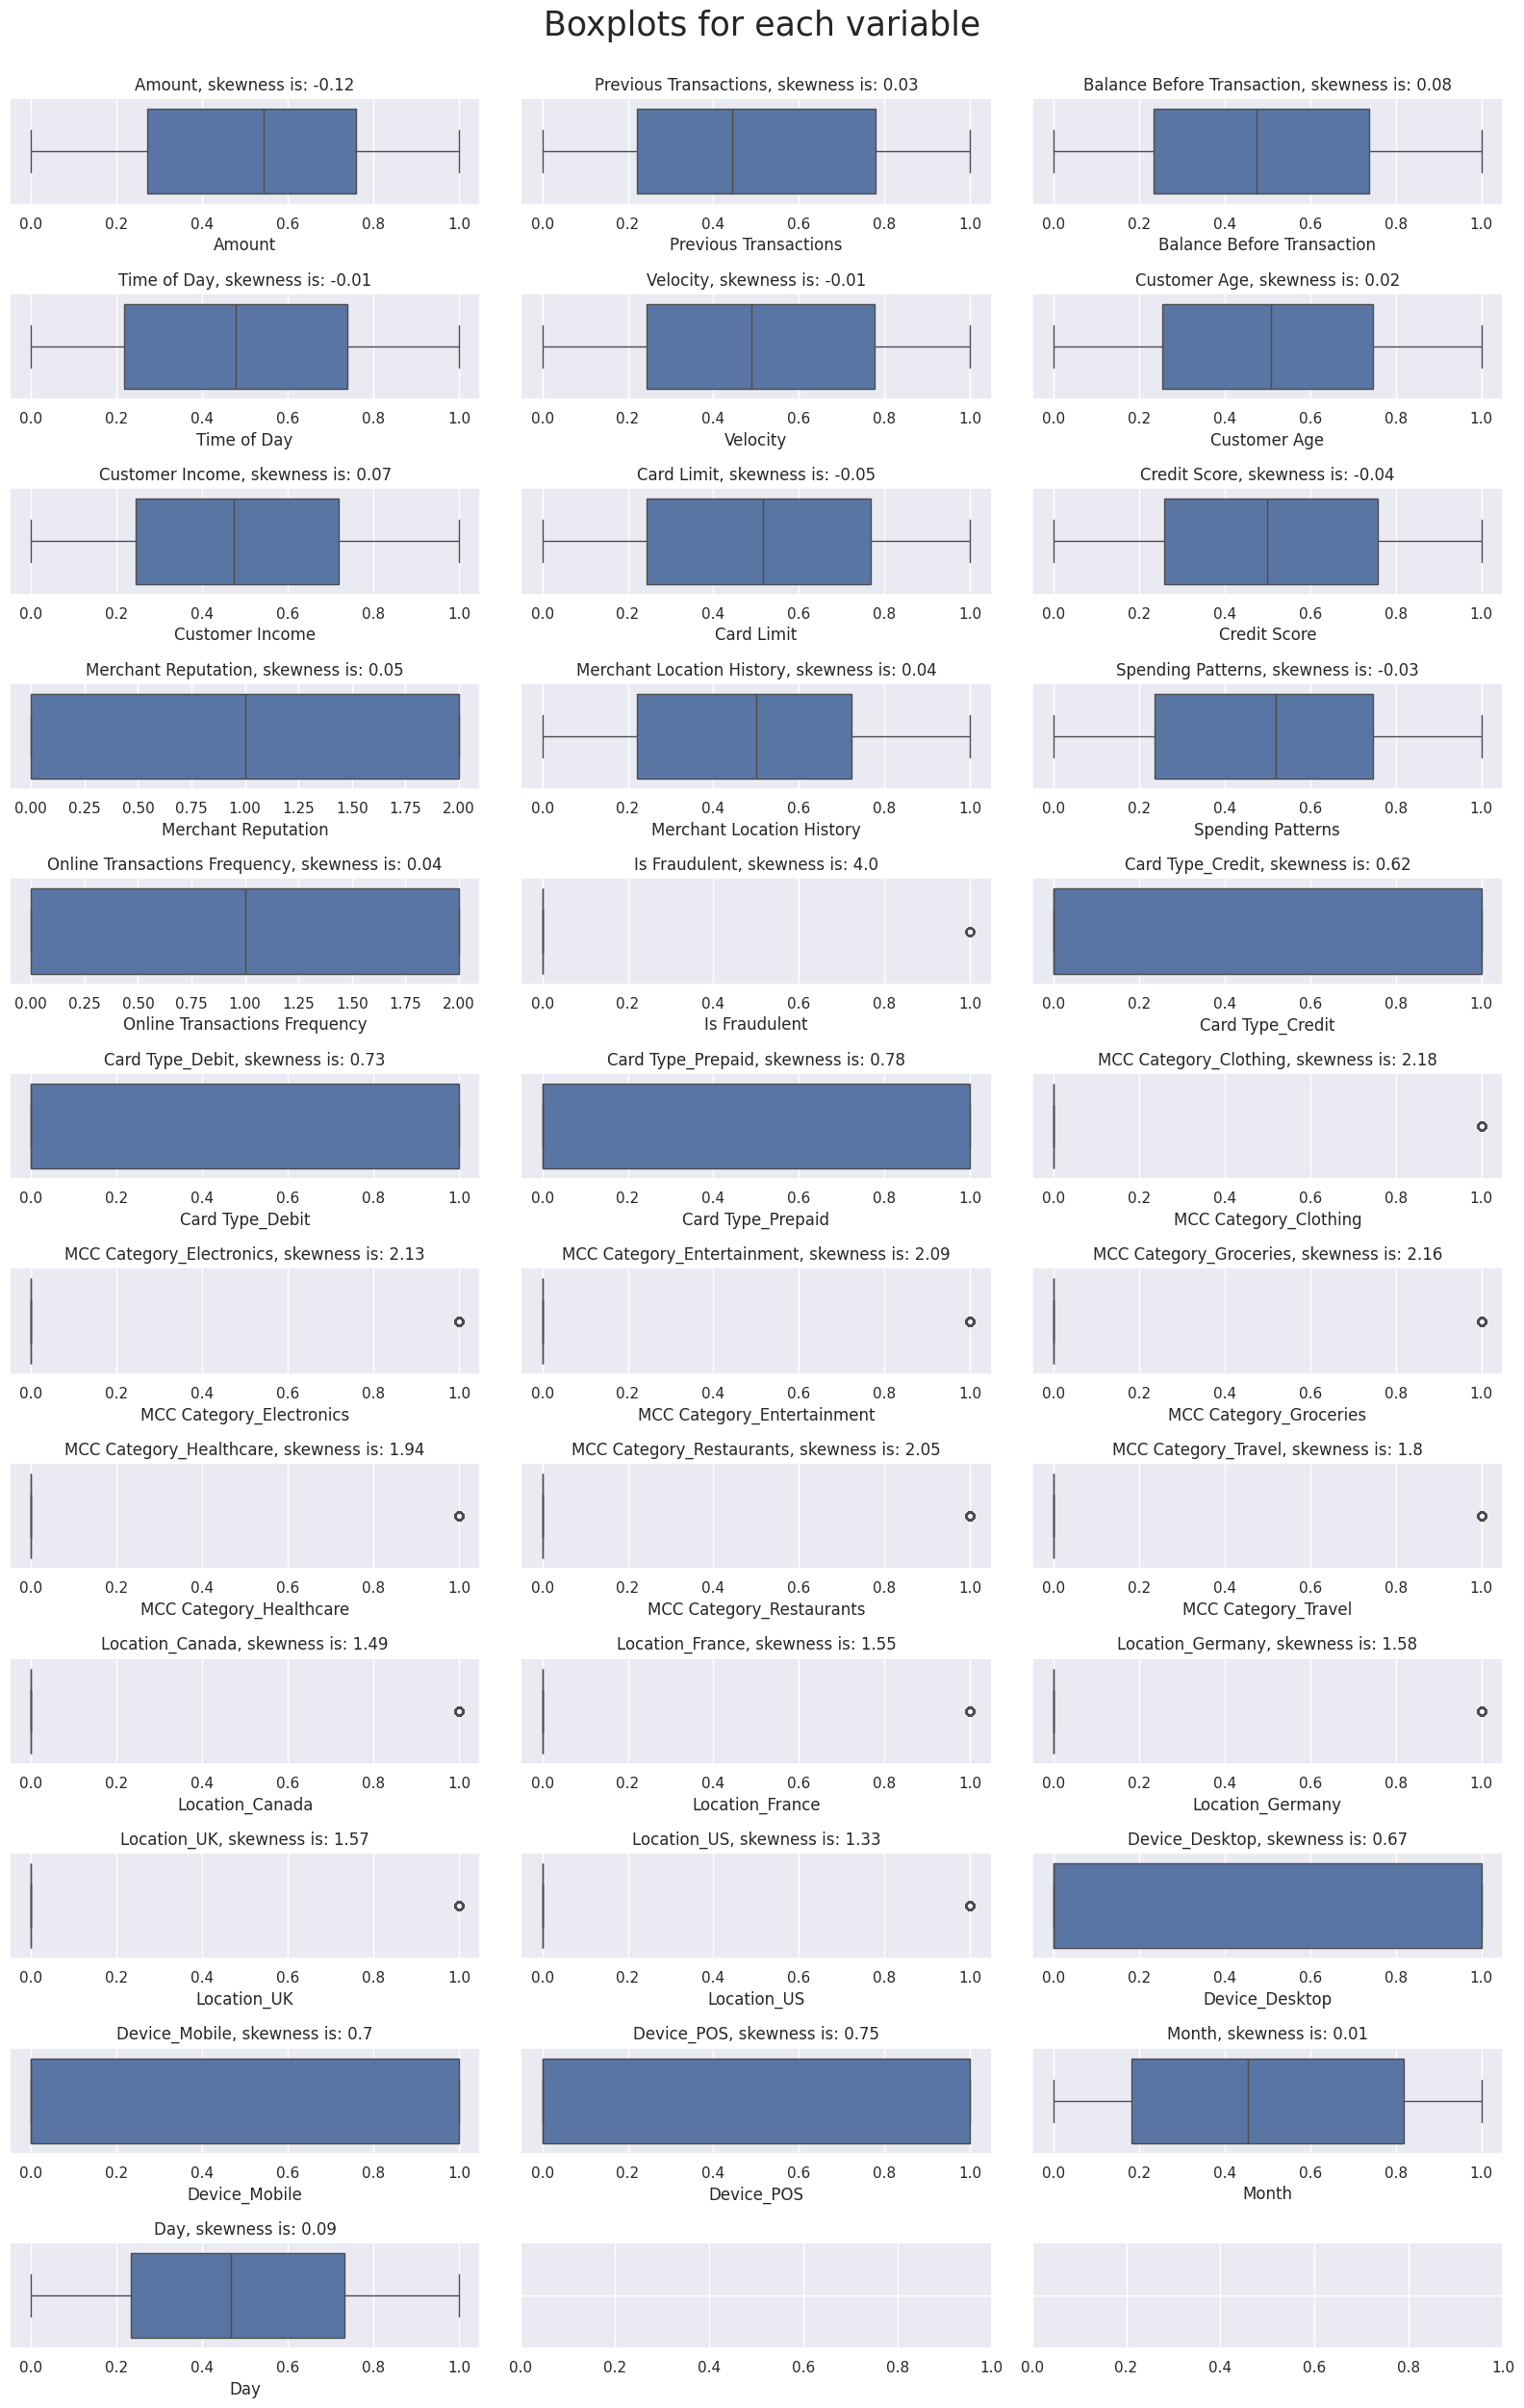

In [80]:
numeric_columns = (list(fe_df.loc[:, 'Amount':'Day']))

rows, columns = fe_df.shape

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=fe_df, columns_list=numeric_columns, rows=12, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

We have a significant problems with outliers:

1. huge outliers;

2. higly skeved data;

3. A lot of outliers.



In [81]:
from collections import Counter

def IQR_method (fe_df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    fe_df.head()
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(fe_df[column], 25)
        #print("Q1: ",Q1)
        # 3rd quartile (75%)
        Q3 = np.percentile(fe_df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = fe_df[(fe_df[column] < Q1 - outlier_step) | (fe_df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = fe_df[fe_df[column] < Q1 - outlier_step]
    out2 = fe_df[fe_df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

# detecting outliers
Outliers_IQR = IQR_method(fe_df,1,numeric_columns)

# dropping outliers
df_out = fe_df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


Checking deleted outliers Fraudulent vs Non Fraudulent

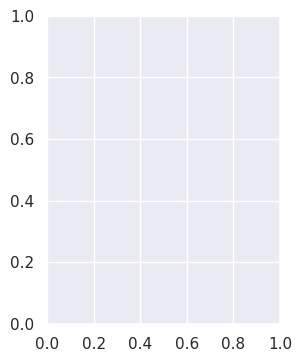

In [82]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Is Fraudulent',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

## Feature Correlation
Lets perform correlation analysis on the dataset. There are sevral methods to do the same. Lets use the heatmap with the Seaborn library.

This will provide relation between features which will help to select the features for training and testing models.

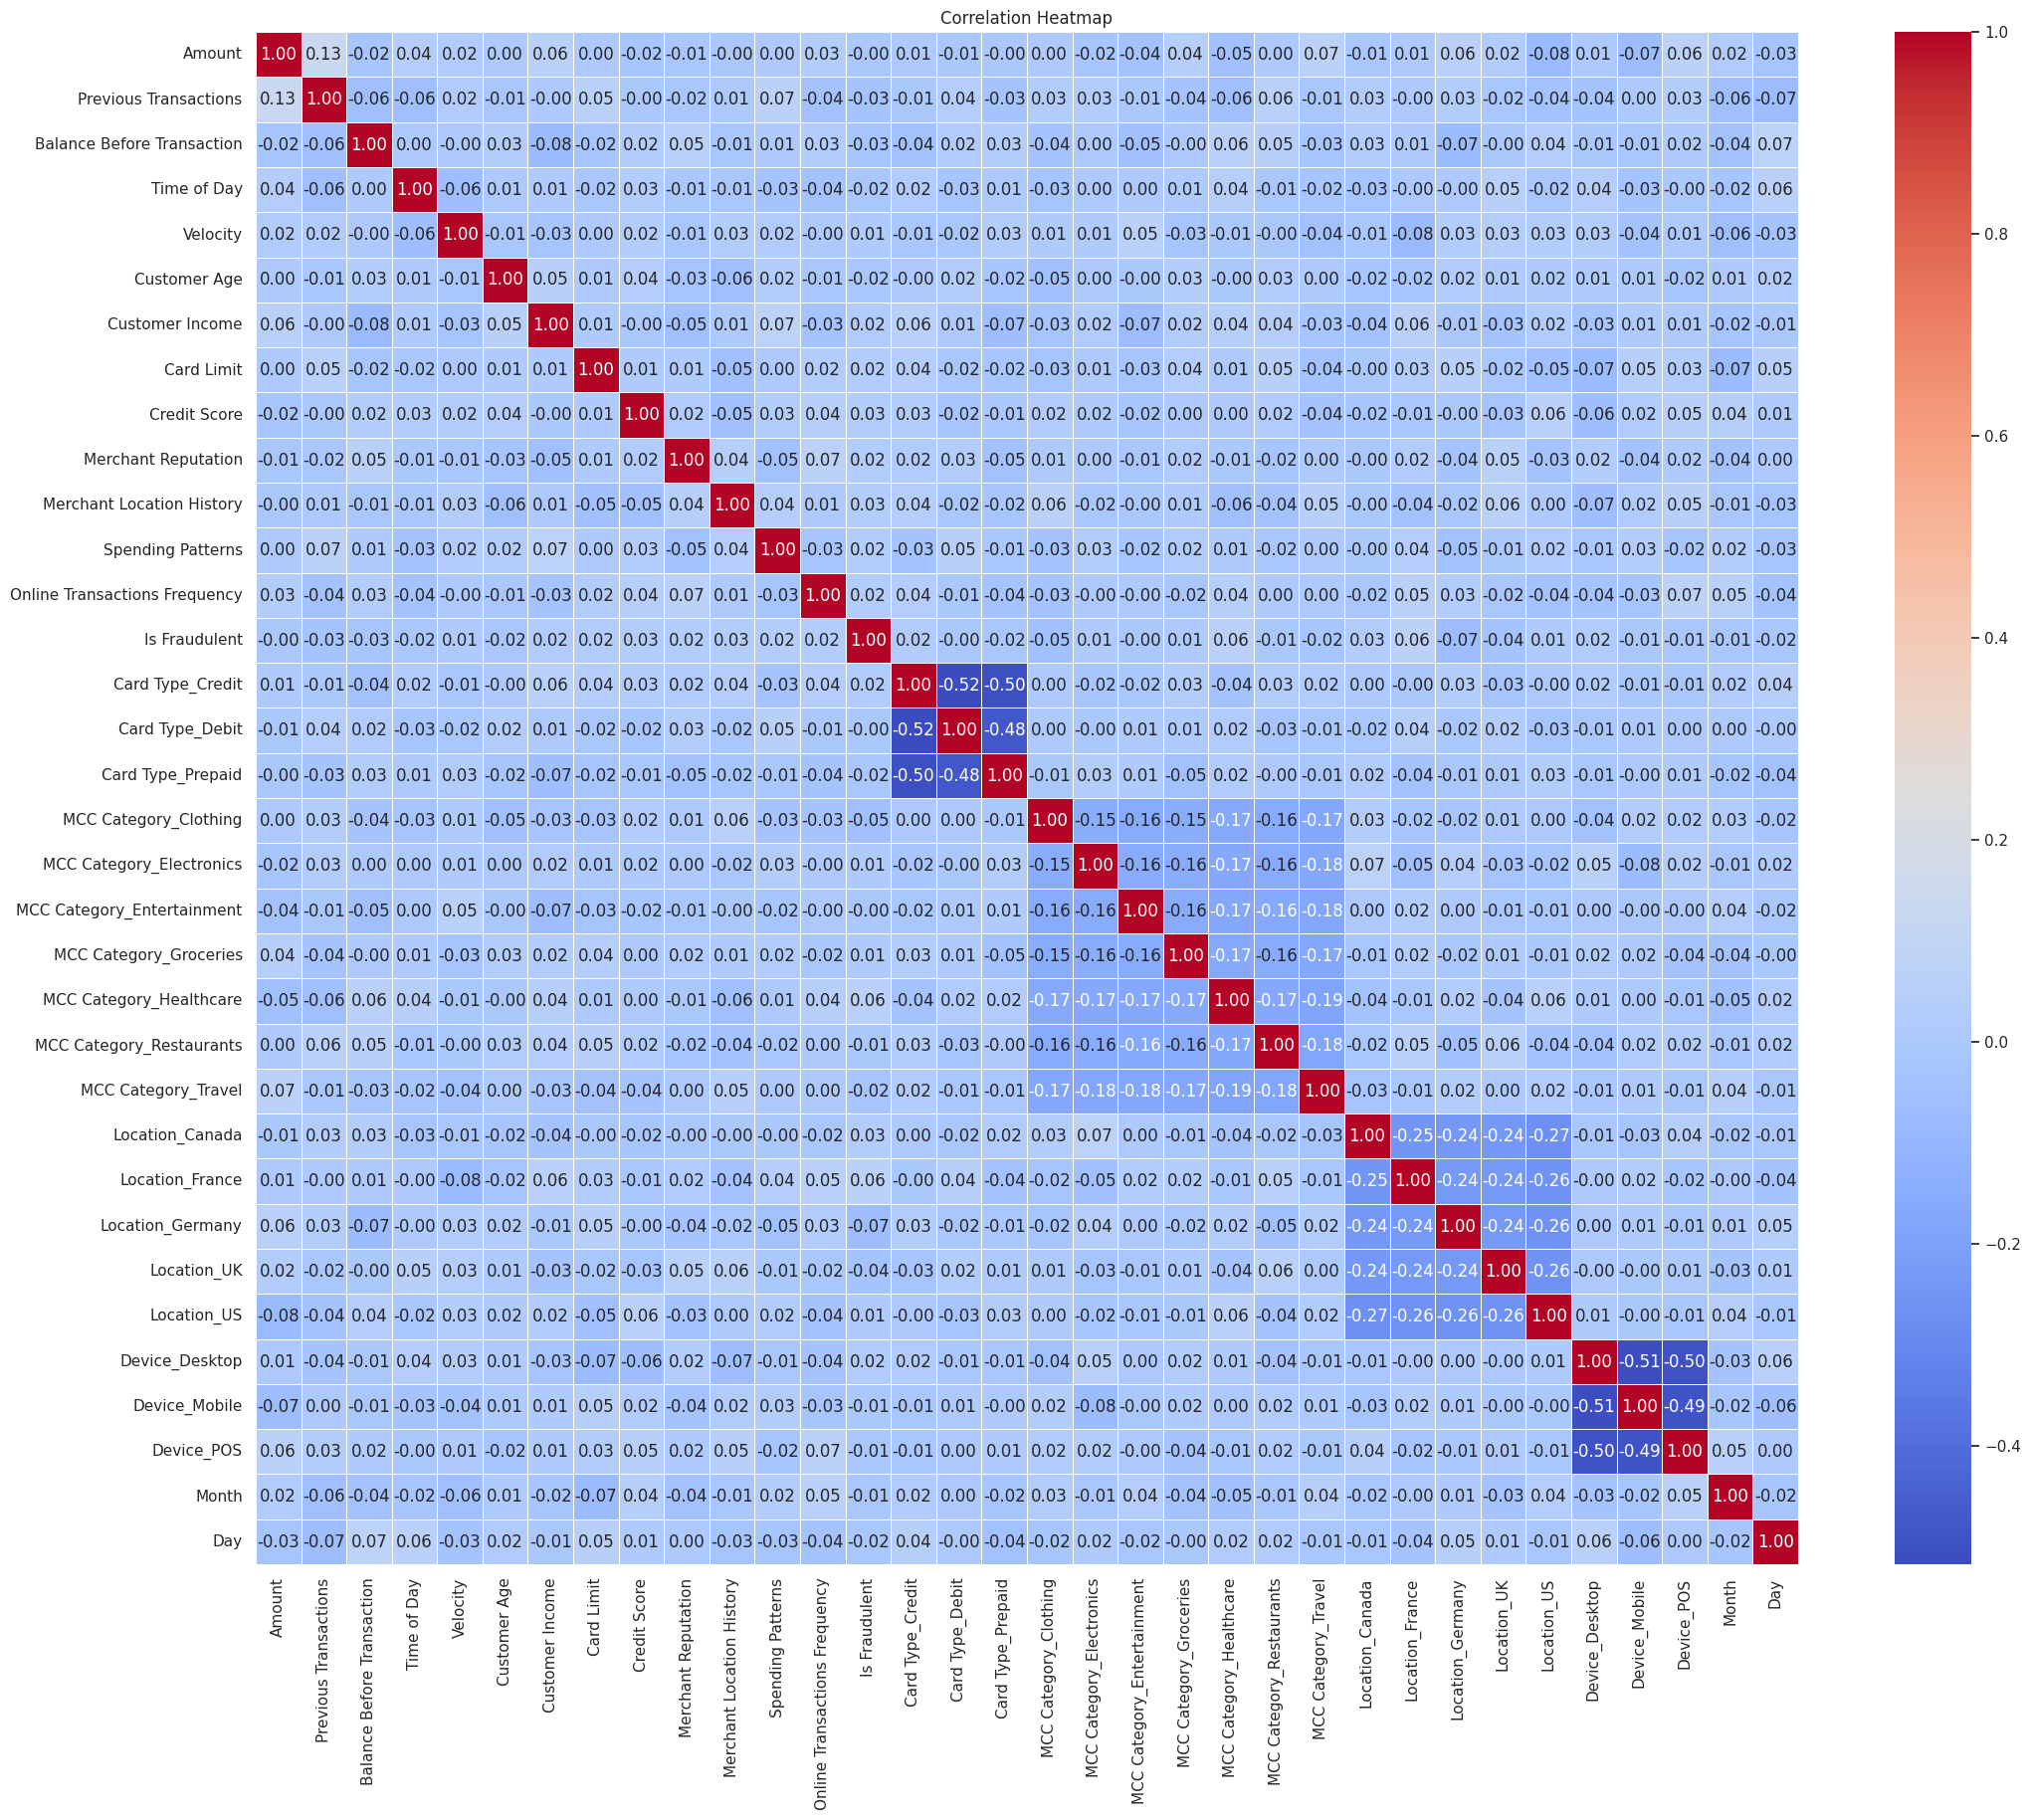

In [83]:
# Perform correlational analysis
correlation_matrix = fe_df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

heatmap is not helping with information about the dependecy features over other feature. This might be due to data imbalance.

In [84]:
# pairplot with hue target class variable "Is Fraudulent"
#sns.pairplot(fe_df, hue ='Is Fraudulent')
#sns.pairplot(df)
# to show
#plt.show()

## **Feature Selection**

In [85]:
# Splitting data into features and target variable
X = fe_df.drop(columns=["Is Fraudulent"])
y = fe_df["Is Fraudulent"]

# Univariate Feature Selection with chi-square test
selector_univariate = SelectKBest(score_func=chi2, k=min(5, X.shape[1]))
X_univariate = selector_univariate.fit_transform(X, y)

# Multivariate Feature Selection with Recursive Feature Elimination (RFE)
clf = RandomForestClassifier()
selector_multivariate = RFE(estimator=clf, n_features_to_select=min(5, X.shape[1]), step=1)
X_multivariate = selector_multivariate.fit_transform(X, y)

# Get selected features
selected_features_univariate = X.columns[selector_univariate.get_support()]
selected_features_multivariate = X.columns[selector_multivariate.support_]

print("Selected features (Univariate):", selected_features_univariate)
print("Selected features (Multivariate):", selected_features_multivariate)

# Performing feature selection using SelectKBest with chi-square test
X_selected = SelectKBest(score_func=chi2, k=5).fit_transform(X, y)
print("X_selected features: \n", X_selected)


Selected features (Univariate): Index(['MCC Category_Clothing', 'MCC Category_Healthcare', 'Location_France',
       'Location_Germany', 'Location_UK'],
      dtype='object')
Selected features (Multivariate): Index(['Balance Before Transaction', 'Customer Income', 'Card Limit',
       'Credit Score', 'Spending Patterns'],
      dtype='object')
X_selected features: 
 [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


The univariate categorical features indicate the absence or presence of specific transaction categories and locations, but further analysis is needed to understand their predictive power.

The multivariate numerical features such as Amount, Balance Before Transaction, Customer Income, Card Limit, and Credit Score are critical in financial analysis and risk assessment. However, without more context on their values and distributions, it's challenging to draw specific conclusions about their impact on the model's performance or their importance in predicting fraudulent transactions.

To gain a better understanding of the selected features and their predictive power, it would be beneficial to perform exploratory data analysis, visualize distributions, check for correlations, and potentially conduct feature importance ranking or selection techniques.







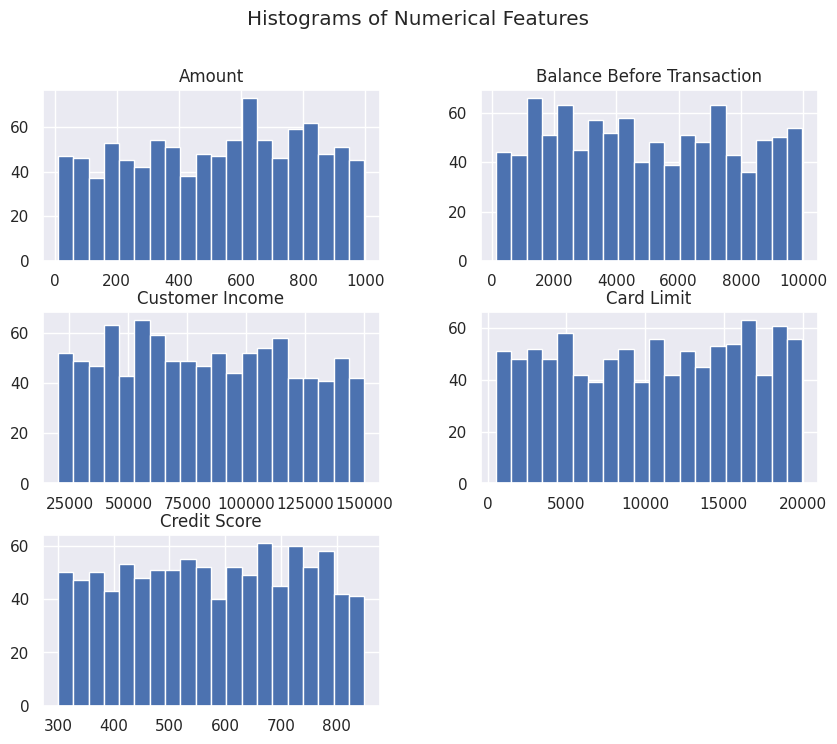

<ipython-input-86-2c42b8358551>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



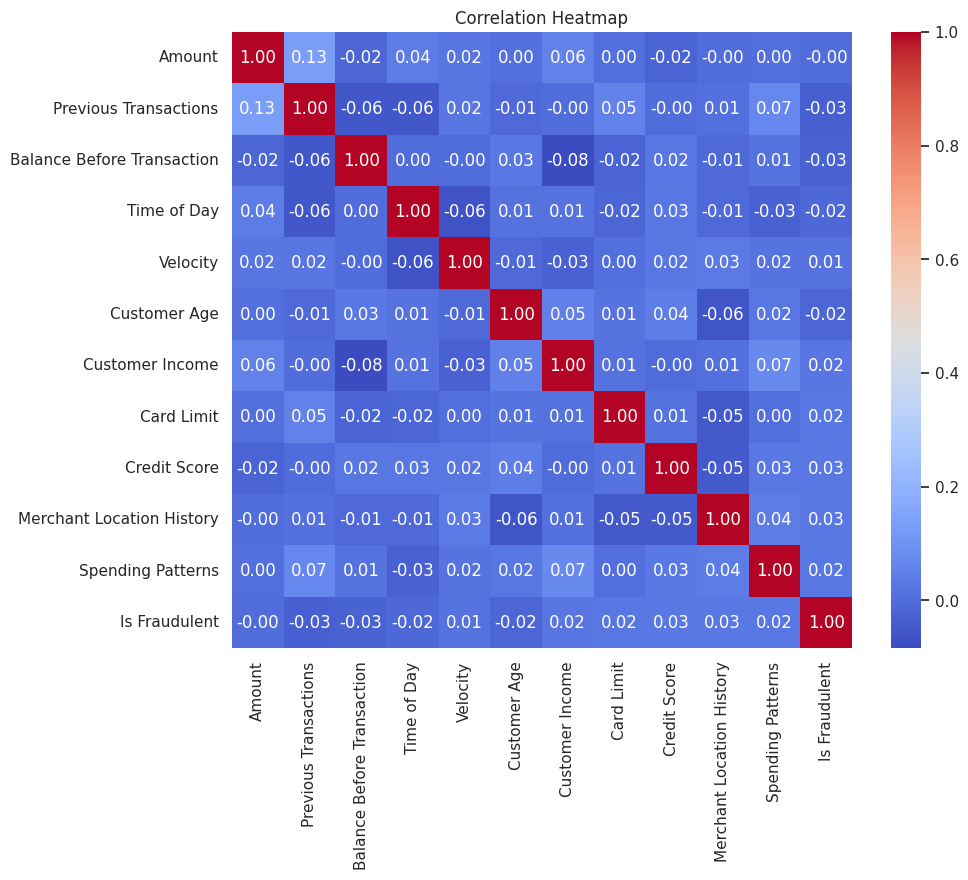

In [86]:
# Visualize distributions of numerical features
numerical_features = ['Amount', 'Balance Before Transaction', 'Customer Income', 'Card Limit', 'Credit Score']
df[numerical_features].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Check for correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **MODEL TRAINING**


# Spliting data into Training - 80% and Test - 20%

In [87]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, test_size=0.2, random_state=42)


## MODEL TESTING: Logistic Regression

Keeping default hyperparameters

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Logistic Regression model
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Evaluate model performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)



Logistic Regression Accuracy: 0.945
Confusion Matrix:
 [[189   0]
 [ 11   0]]


**Observations:**
Logistic Regression Accuracy: 0.945
Confusion Matrix:
True Positive (TP): 189
False Positive (FP): 0
True Negative (TN): 0
False Negative (FN): 11

From the confusion matrix, it's evident that the dataset is imbalanced, especially towards the negative class. This can be observed from the high number of true negatives (TN = 0) and the presence of false negatives (FN = 11). Class imbalance can impact model performance and should be considered during model evaluation.

Lets display Confusion matrix in graphic form.


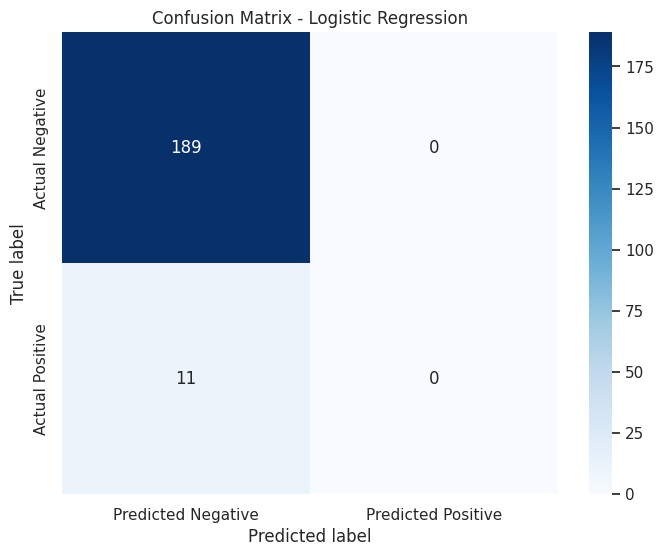

In [89]:
# Generate confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



Classification report of **Logistic Regression** with Precision, recall, f1-score and support data.

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



The accuracy of the model is 94% with high f1-score = 97%.

* The model performs very well in terms of precision and accuracy for the negative class (class 0.0), correctly identifying almost all negative instances. However, it performs poorly for the positive class (class 1.0), with zero recall and precision, indicating a complete failure to identify positive instances.

* The overall high accuracy is misleading due to the class imbalance. The model's inability to detect positive instances is a critical issue, especially if correctly identifying positive cases is important (e.g., fraud detection, rare disease diagnosis). The model needs significant improvement, possibly through techniques or using different algorithms more suitable for imbalanced data.

## Cross validation score of Logistic Regression

Cross-validation scores (Logistic Regression): [0.95    0.95    0.95    0.94375 0.94375]


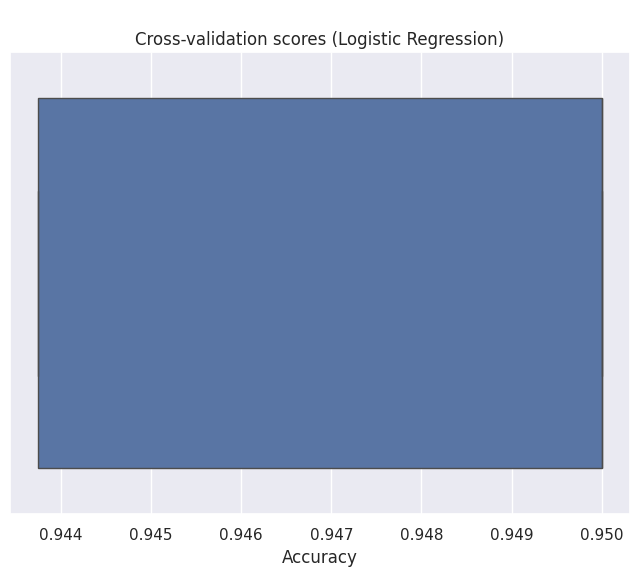

In [91]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Logistic Regression):", cv_scores)


# Plot boxplot of cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title("\nCross-validation scores (Logistic Regression)")
plt.xlabel("Accuracy")
plt.show()

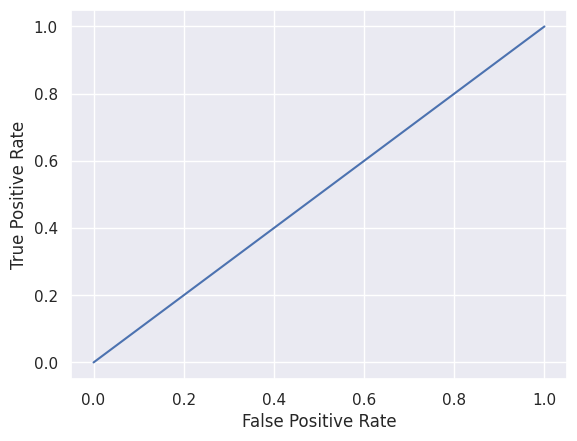

In [92]:
#define metrics
y_pred_proba =logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_logistic)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## VISUALIZING TRAINING AND TESTING DATASETS

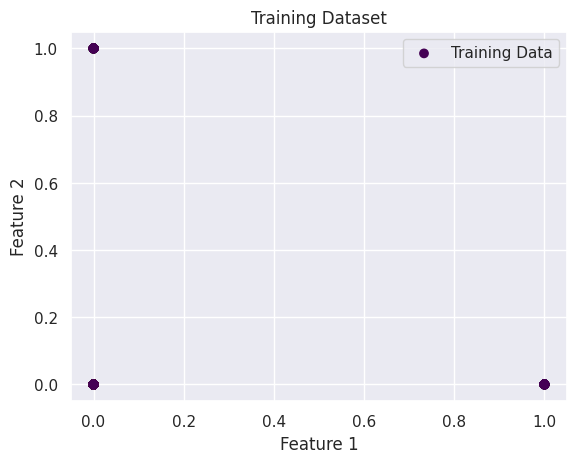

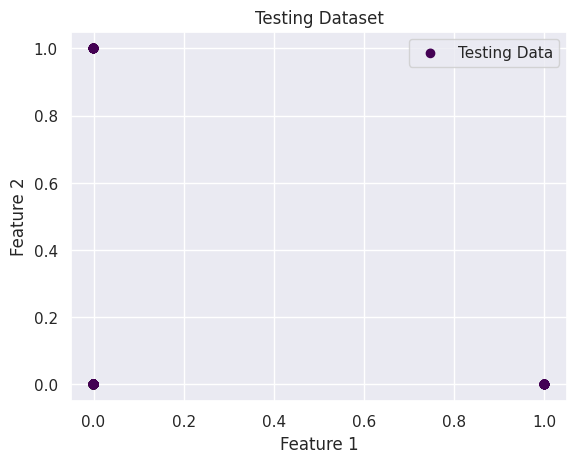

In [93]:
# Plot training dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.title('Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot testing dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Testing Data')
plt.title('Testing Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

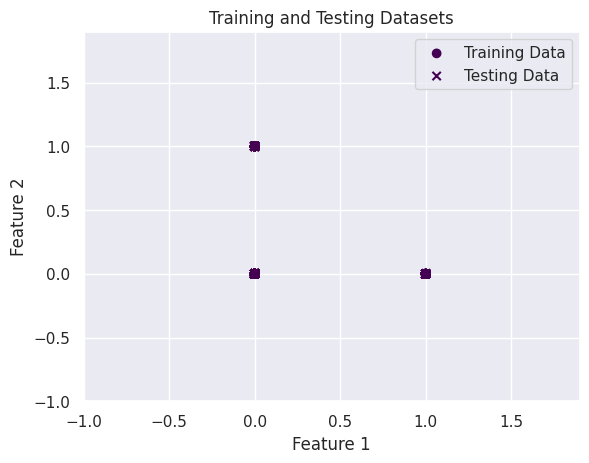

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Generate meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot training dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')

# Plot testing dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Training and Testing Datasets')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [95]:
y_train.shape

(800,)

In [96]:
X_train.shape

(800, 5)

In [97]:
xx.shape

(30, 30)

All these visulation methods are pointing to a issue with logistic model which is not able to predict accuractly due to imbalanced dataset.

Next we will try another model Decision tree to predict the class.
Also later, we will try to finetune the hyperparamaters on both models.

## MODEL TESTING: Decistion Tree

Keeping model with default hyperparameter

In [98]:
# Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Generate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Logistic Regression Accuracy:", accuracy_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

Decision Tree Accuracy: 0.945
Logistic Regression Accuracy: 0.945
Confusion Matrix:
 [[189   0]
 [ 11   0]]


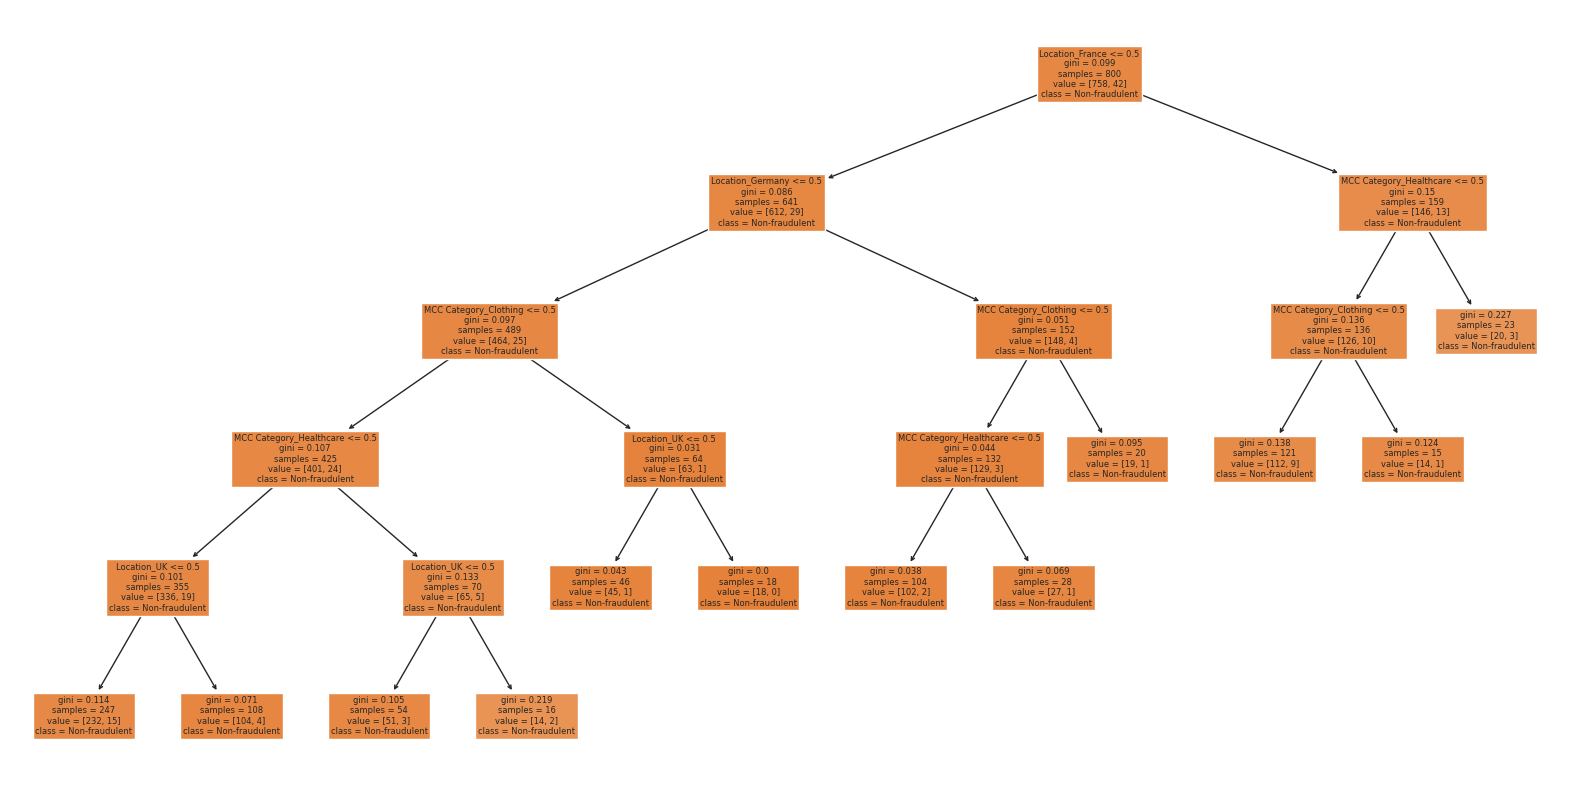

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=selected_features_univariate, class_names=['Non-fraudulent', 'Fraudulent'])
plt.show()

As we can observe that Decision tree model is also providing similar results as Logistic regression. Its again only able to predict non-fraudlent class which is due to highly imbalanced dataset.

Both of the models are failed to predict accuratlty.

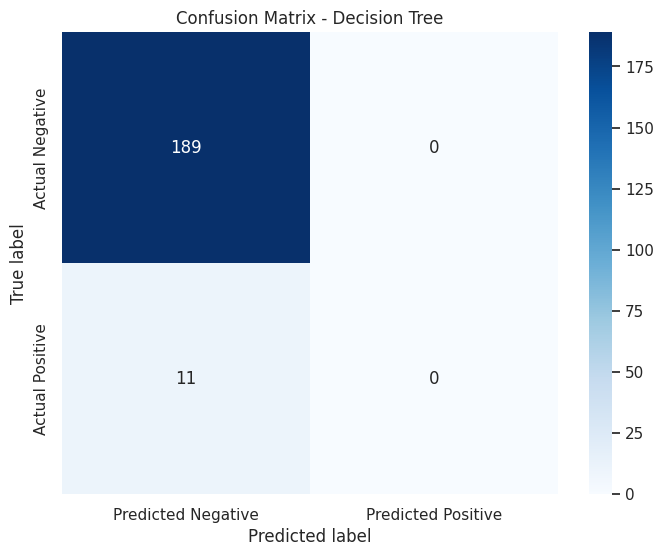

In [100]:

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [101]:
print(classification_report(y_test, y_pred_tree, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



The accuracy of the model is 94% with high f1-score = 97%.

* The model performs very well in terms of precision and accuracy for the negative class (class 0.0), correctly identifying almost all negative instances. However, it performs poorly for the positive class (class 1.0), with zero recall and precision, indicating a complete failure to identify positive instances.

* The overall high accuracy is misleading due to the class imbalance. The model's inability to detect positive instances is a critical issue, especially if correctly identifying positive cases is important (e.g., fraud detection, rare disease diagnosis). The model needs significant improvement, possibly through techniques or using different algorithms more suitable for imbalanced data.

Cross-validation scores (Decision Tree): [0.95    0.95    0.95    0.94375 0.94375]


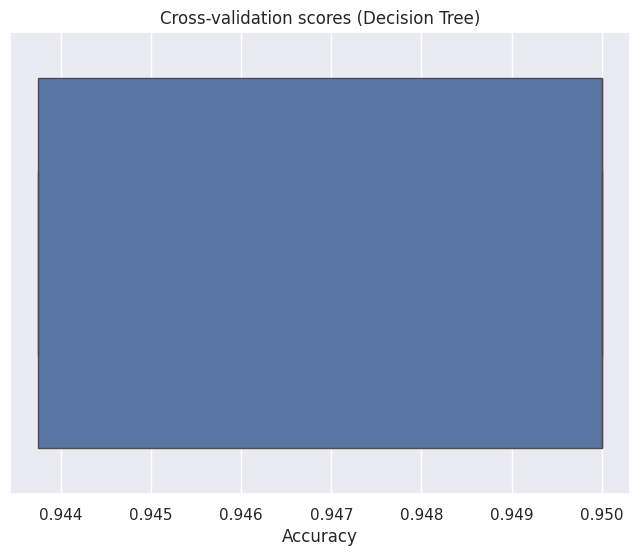

In [102]:
# Perform cross-validation
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores)

# Plot boxplot of cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title("Cross-validation scores (Decision Tree)")
plt.xlabel("Accuracy")
plt.show()

Averaging these scores gives an overall estimate of the model's performance, which can be a useful metric for comparing different models or tuning hyperparameters. In this case, the average cross-validation score would be around 0.9455, which is a strong indication of the model's effectiveness.

But this is misleading due to imbalance class.

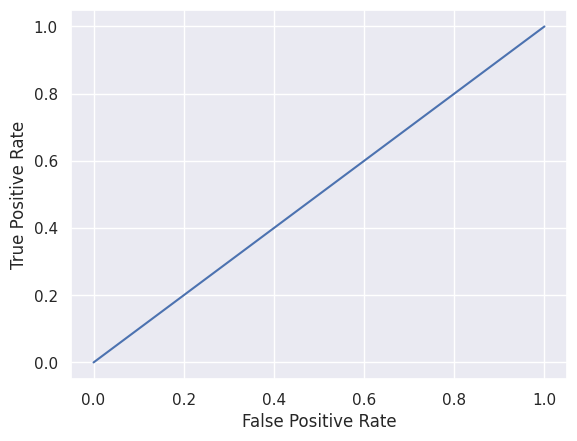

In [103]:
#define metrics
y_pred_proba = tree_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_tree)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As its observed that both of the model are failed to predict accuratly both the classes. we will try to finetune hyperparamaters of both the models and observe the predictions.

Lets split the dataset into training and testing i.e 60%-40%.
Also we will change the hyperparameters.

1. **Spliting the Data set** se below

2. Changing the **hyperparamerts** as below

3. We are also trying the **RandomOverSampler** to balance the data

In [104]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

First checking with **Logistic regresion model**

In [105]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

# Define oversampling strategy
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_over, y_over = ros.fit_resample(X_train, y_train)

# Print the class distribution after oversampling
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=13)

# Define the pipeline with oversampling and logistic regression
pipeline = Pipeline([
    ('random_oversampler', RandomOverSampler(random_state=42)),
    ('logistic_regression', logistic_model)
])

# Define the parameter grid for grid search
param_grid = {
    'logistic_regression__penalty': ['l2'],            # Regularization penalty
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10],     # Inverse of regularization strength
    'logistic_regression__solver': ['liblinear', 'lbfgs'],    # Optimization algorithm
    'logistic_regression__max_iter': [100, 200, 300],        # Maximum number of iterations
    'logistic_regression__random_state': [13]                # Random state for reproducibility
}

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search to find the best parameters
grid_search.fit(X_over, y_over)

# Get the best logistic regression model from the grid search
best_lr_model = grid_search.best_estimator_
print("\nBest model from grid search: ",best_lr_model)

# Use the best model to predict on the test data
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)


Genuine: 568 / 50.0 % of the dataset
Frauds: 568 / 50.0 % of the dataset
Fitting 10 folds for each of 30 candidates, totalling 300 fits

Best model from grid search:  Pipeline(steps=[('random_oversampler', RandomOverSampler(random_state=42)),
                ('logistic_regression',
                 LogisticRegression(C=0.1, random_state=13,
                                    solver='liblinear'))])
              precision    recall  f1-score   support

         0.0       0.97      0.50      0.66       379
         1.0       0.07      0.71      0.13        21

    accuracy                           0.51       400
   macro avg       0.52      0.61      0.40       400
weighted avg       0.92      0.51      0.63       400


Confusion Matrix:
 [[189 190]
 [  6  15]]


while the model shows decent recall for fraud detection, indicating its ability to catch actual fraud cases, the high false-positive rate suggests that it also flags a significant number of genuine transactions as fraudulent.

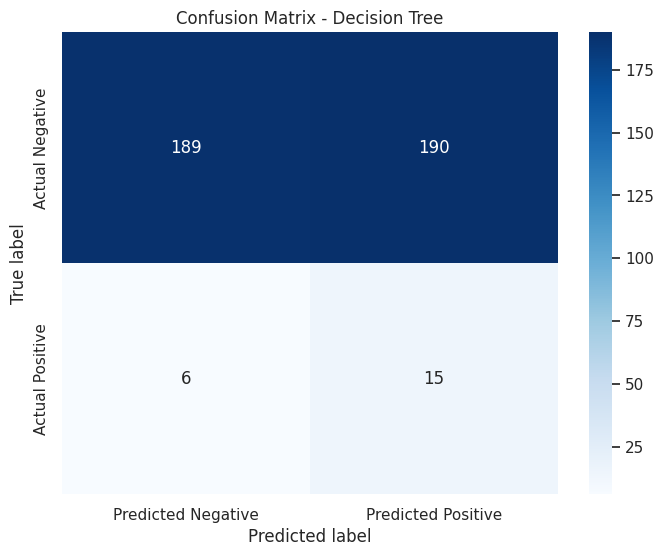

In [106]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [107]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.97      0.50      0.66       379
         1.0       0.07      0.71      0.13        21

    accuracy                           0.51       400
   macro avg       0.52      0.61      0.40       400
weighted avg       0.92      0.51      0.63       400



Observation: By applying the RandomOversampler, chaning the hyperparameters are providing better results with
* precisoin = 97%
* F1-score=66% along with
* Accuracy=51%

While the model performs well in identifying non-fraudulent transactions (high precision and relatively good F1-score), it struggles with fraud detection due to low precision and a relatively low F1-score for class 1.0. This highlights the challenge of dealing with imbalanced datasets in fraud detection, where the focus is often on correctly identifying fraudulent cases while minimizing false positives.

I have changed hyperparameters with different values and found these as better results. We may try more combinations to find more finetuned hyperparameters to get much better results.

Next we will apply **SMOTE** method to balance the dataset

## SMOTE with Logistic Regression

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


lr_model = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=100, class_weight=None, random_state=13)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred = lr_model.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.53      0.68       379
         1.0       0.08      0.71      0.14        21

    accuracy                           0.54       400
   macro avg       0.52      0.62      0.41       400
weighted avg       0.92      0.54      0.66       400

Accuracy: 0.5375


Observation: By applying the SMOTE and chaning the hyperparameters, are providing better results with

* precisoin = 97%
* F1-score = 68% along with
* Accuracy = 54%

The observations are similar and model is performing well to identifying non-fraudulent transactions (high precision and relatively good F1-score), it struggles with fraud detection due to low precision and a relatively low F1-score for class 1.0. This highlights the challenge of dealing with imbalanced datasets in fraud detection, where the focus is often on correctly identifying fraudulent cases while minimizing false positives.


## Decision Tree with finetuned Hyperparameters

In [109]:
# Decision Tree model

# Define hyperparameters for Decision Tree
# Example: max_depth, min_samples_split, min_samples_leaf, max_features, etc.
hyperparameters = {
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': None  # Change as needed
}

#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#tree_model2 = DecisionTreeClassifier(**hyperparameters)
#tree_model2.fit(X_train_resampled, y_train_resampled)


# Define the pipeline with oversampling and logistic regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(max_depth=10))
])

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'smote__k_neighbors': [3, 5, 7],  # Number of nearest neighbors to use in SMOTE
    'classifier__max_depth': [10, 20, 30],  # Maximum depth of the decision tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search to find the best parameters
grid_search.fit(X_over, y_over)

# Get the best decision tree model from the grid search
best_tree_model = grid_search.best_estimator_.named_steps['classifier']

# Get the best logistic regression model from the grid search
best_lr_model = grid_search.best_estimator_
print("\nBest model from grid search: ",best_lr_model)



y_pred_tree_2 = best_lr_model.predict(X_test)

accuracy_tree_2 = accuracy_score(y_test, y_pred_tree_2)
print("Decision Tree Accuracy:", accuracy_tree_2)

# Generate confusion matrix
conf_matrix_tree_2 = confusion_matrix(y_test, y_pred_tree_2)

print("Logistic Regression Accuracy:", accuracy_tree_2)
print("\nConfusion Matrix:\n", conf_matrix_tree_2)



Fitting 10 folds for each of 81 candidates, totalling 810 fits

Best model from grid search:  Pipeline(steps=[('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])
Decision Tree Accuracy: 0.475
Logistic Regression Accuracy: 0.475

Confusion Matrix:
 [[175 204]
 [  6  15]]


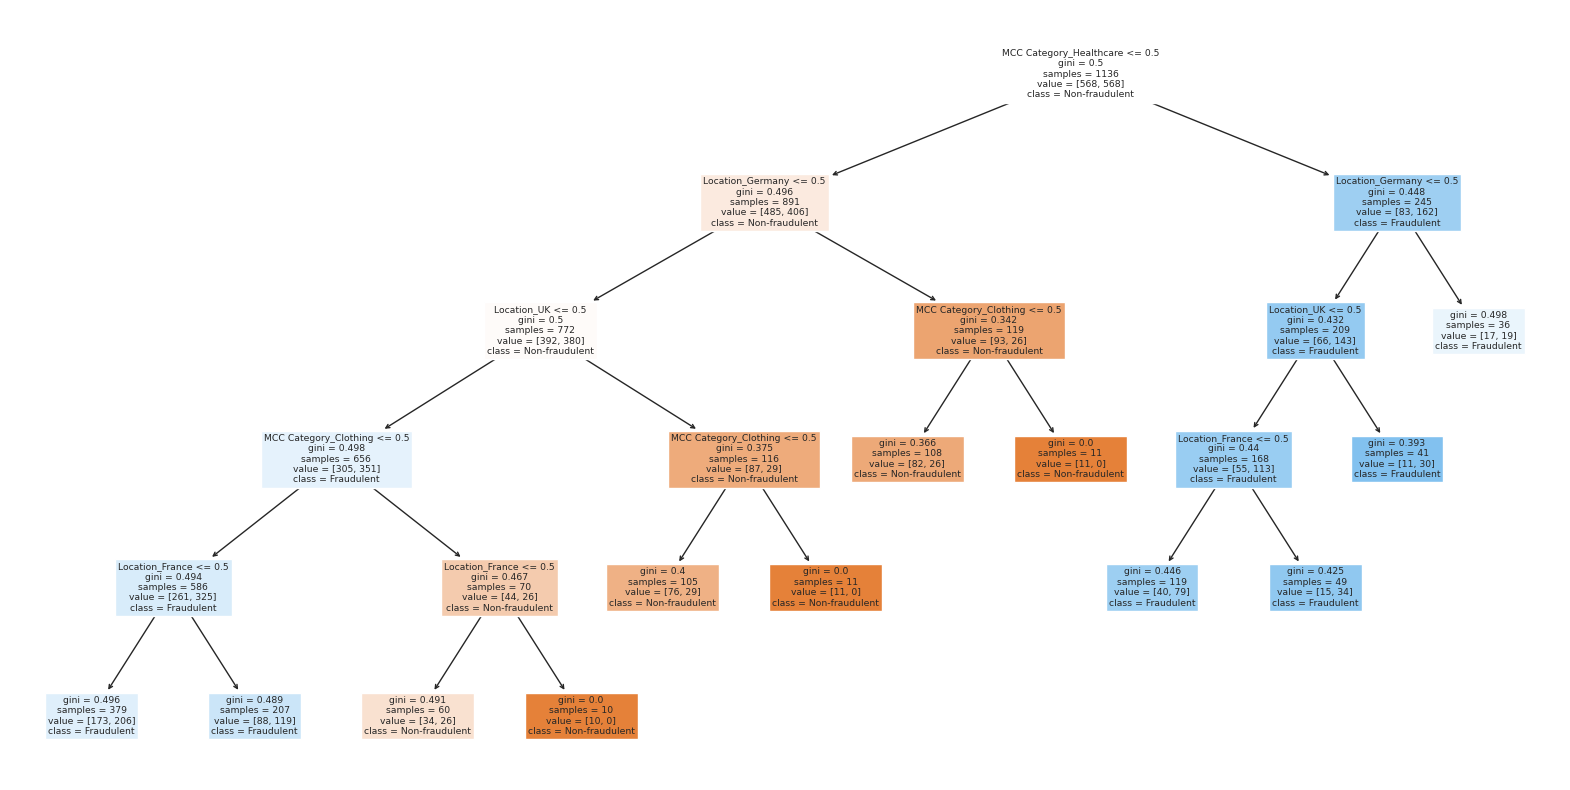

In [110]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree_model, filled=True, feature_names=selected_features_univariate, class_names=['Non-fraudulent', 'Fraudulent'])
plt.show()

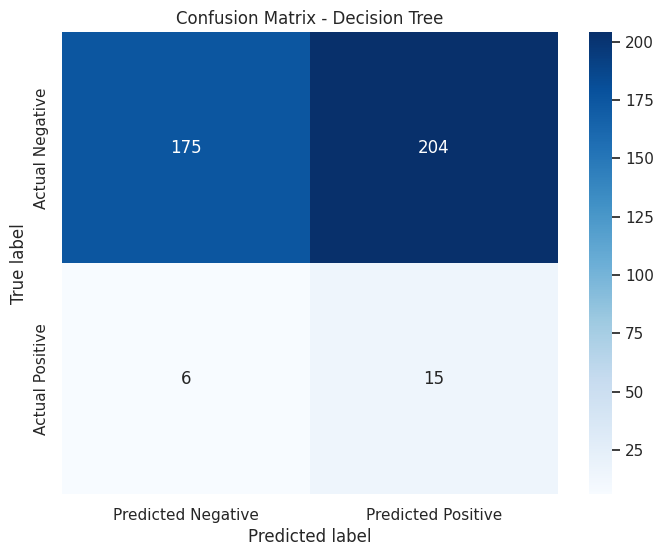

In [111]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_2, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


The confusion matrix shows that the models correctly predicted 175 non-fraudulent transactions and 15 fraudulent transactions, but they also misclassified 204 non-fraudulent transactions as fraudulent and 6 fraudulent transactions as non-fraudulent.

In summary, while the models achieved the same accuracy, they struggled with misclassifications, especially in predicting non-fraudulent transactions as fraudulent.

In [112]:
print(classification_report(y_test, y_pred_tree_2))

              precision    recall  f1-score   support

         0.0       0.97      0.46      0.62       379
         1.0       0.07      0.71      0.12        21

    accuracy                           0.48       400
   macro avg       0.52      0.59      0.38       400
weighted avg       0.92      0.47      0.60       400



The model shows high precision but low recall for class 0.0, indicating that it is good at identifying non-fraudulent transactions but misses a significant number of actual non-fraudulent transactions.

The overall accuracy of 0.48 is relatively low, indicating that the model's performance is not satisfactory and there is room for improvement.

while the model performs reasonably well for non-fraudulent transactions, it requires significant improvement in detecting fraudulent transactions to be considered reliable for fraud detection purposes.

## Conclusion:
# Logistic Regression
* Accuracy with default model hyperparameters: 95%
* Accuracy with hyperparameter tune and RandomOverSampler: 51%
* Accuracy with hyperparameter tune and SMOTE: 54%

# Decision Tree
* Accuracy with default mode hyperparamaters: 95%
* Accuracy with hyperparameter and SMOTE: 48%


The logistic regression model had a slightly higher accuracy than the Decision Tree model.
However, both models exhibited challenges in correctly identifying fraudulent transactions, as seen in their confusion matrices.
The precision-recall trade-off is evident, where higher precision (correctly identifying non-fraudulent transactions) comes at the cost of lower recall (missing fraudulent transactions), and vice versa.

Overall, while both logistic regression and decision tree models were trained and evaluated, they both faced challenges in accurately predicting fraudulent transactions.

## Lets Build ML models using K-Nearest Neighbors (K-NN), Naive Bayesian, Random Forest, and Adaboost

## K-Nearest Neighbors (K-NN) with default hyperparameters

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming X_test and y_test are your test features and target variable
# Assuming knn_model is your trained K-NN model

knn_model = KNeighborsClassifier(n_neighbors=5)  # Example: using 5 neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division = 0))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



Accuracy: 0.9475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

Confusion Matrix:
[[379   0]
 [ 21   0]]


While the model achieved high accuracy overall, its performance on detecting fraudulent transactions is extremely poor, with a complete failure to identify any true positives for class 1.

This indicates a severe imbalance or inadequacy in the model's ability like Logistic regresion and decision tree models to capture the patterns associated with fraudulent transactions.

It is importent to finetune the hyperparameters to get better results.

## K-Nearest Neighbors (K-NN) with hyperparameters fine-tuning

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with oversampling and logistic regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#  Define the parameter grid for grid search
param_grid_knn = {
    'smote__k_neighbors': [3, 5, 7],  # Number of neighbors for SMOTE
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors for KNN
    'classifier__weights': ['uniform', 'distance'],  # Weighting of neighbors
    'classifier__p': [1, 2]  # Power parameter for Minkowski distance metric
}
# Create the GridSearchCV object for K-NN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=cv, scoring='accuracy')

# Perform grid search for K-NN
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and best score for K-NN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Get the best KNN model from the grid search
best_knn_model = grid_search_knn.best_estimator_
print("Best model from grid search:", best_knn_model)

# Make predictions
y_pred_knn = best_knn_model.predict(X_test)

# Print the best hyperparameters and best score for K-NN
print("\nBest Hyperparameters for K-NN:", best_params_knn)
print("\nBest Score for K-NN:", best_score_knn)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, zero_division = 0))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Best model from grid search: Pipeline(steps=[('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('classifier', KNeighborsClassifier(n_neighbors=3, p=1))])

Best Hyperparameters for K-NN: {'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform', 'smote__k_neighbors': 3}

Best Score for K-NN: 0.9466666666666667

Accuracy: 0.9475

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400


Confusion Matrix:
[[379   0]
 [ 21   0]]


Lets try **Randomized search**

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter distributions for K-NN
param_dist_knn = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the RandomizedSearchCV object for K-NN
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, cv=5, scoring='accuracy', n_iter=20, random_state=42)

# Perform randomized search for K-NN
random_search_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Get the best hyperparameters and best score for K-NN
best_params_knn_rand = random_search_knn.best_params_
best_score_knn_rand = random_search_knn.best_score_

# Print the best hyperparameters and best score for K-NN
print("Best Hyperparameters for K-NN (Randomized Search):", best_params_knn_rand)
print("Best Score for K-NN (Randomized Search):", best_score_knn_rand)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, zero_division = 0))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Best Hyperparameters for K-NN (Randomized Search): {'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
Best Score for K-NN (Randomized Search): 0.9466666666666665

Accuracy: 0.9475

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400


Confusion Matrix:
[[379   0]
 [ 21   0]]


The best hyperparameters for K-NN obtained from Randomized Search are:
* Algorithm: 'kd_tree'
* Number of neighbors: 6
* Distance metric power parameter: 1
* Weighting of neighbors: 'uniform'

The best score achieved using Randomized Search for K-NN is approximately 0.947, which is close to the accuracy of the model.

Looking at the classification report:

The model achieved high precision (0.95) for the majority class (0.0), indicating a low false positive rate.
However, the recall and F1-score for the minority class (1.0) are both 0, suggesting that the model struggled to correctly identify instances of the minority class.
The confusion matrix shows that the model correctly predicted all instances of the majority class (0.0), but it misclassified all instances of the minority class (1.0) as the majority class.

In summary, while the model performed well in terms of overall accuracy due to the imbalance in the dataset, it failed to effectively classify instances of the minority class. This indicates a potential issue with class imbalance that may need to be addressed, such as using different sampling techniques or adjusting the model's threshold.

We have tried SMOTE method as well withh the KNN model but all the 3 model are failed predict effectively. KNN models does not show any improvents by finetuning hyperparameters.

## Naive Bayesian with default hyperparameters

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       379
         1.0       0.09      0.05      0.06        21

    accuracy                           0.93       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.90      0.93      0.91       400

Confusion Matrix:
[[369  10]
 [ 20   1]]


## Naive Bayesian with hyperparameters fine-tuning

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

cv=KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best parameters
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, cv=cv, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

# Print the best hyperparameters and best score for Naive Bayesian
print("Best Hyperparameters for Naive Bayesian (Grid Search):", best_params_nb)
print("Best Score for Naive Bayesian (Grid Search):", best_score_nb)

# Train the Gaussian Naive Bayes classifier with the best parameters
best_nb_classifier = GaussianNB(**best_params_nb)
best_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = best_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("\nAccuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Best Hyperparameters for Naive Bayesian (Grid Search): {'var_smoothing': 1e-09}
Best Score for Naive Bayesian (Grid Search): 0.7583333333333334

Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       379
         1.0       0.09      0.05      0.06        21

    accuracy                           0.93       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.90      0.93      0.91       400

Confusion Matrix:
[[369  10]
 [ 20   1]]



Both the NB models show same results. There is no improvements by finetuning hyperparameters.

The Naive Bayes model achieved an accuracy of 0.925, indicating that it correctly classified approximately 92.5% of the instances.

Looking at the classification report:

The model achieved high precision (0.95) for the majority class (0.0), suggesting a low false positive rate.
However, the recall (sensitivity) and F1-score for the minority class (1.0) are both very low (0.05 and 0.06, respectively), indicating that the model struggled to correctly identify instances of the minority class.
The confusion matrix shows that the model correctly predicted 369 instances of the majority class (0.0) but misclassified 10 instances as the minority class (1.0). It correctly predicted only 1 instance of the minority class, while 20 instances were misclassified as the majority class.

In summary, the Naive Bayes model performed well in terms of overall accuracy and precision for the majority class but struggled with recall and F1-score for the minority class. This suggests a potential issue with class imbalance or the model's ability to generalize to the minority class.








## Model: Random Forest without hyperparameters fine-tuning

In [118]:
# Training a classifier on the selected features
clf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
clf_model.fit(X_train, y_train)
y_pred_clf = tree_model.predict(X_test)
# Evaluating the classifier
accuracy_clf = clf_model.score(X_test, y_test)

# Generate confusion matrix
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)

print("Randon Forest Classifier Accuracy:", accuracy_clf)
print("Confusion Matrix:\n", conf_matrix_clf)

Randon Forest Classifier Accuracy: 0.9475
Confusion Matrix:
 [[379   0]
 [ 21   0]]


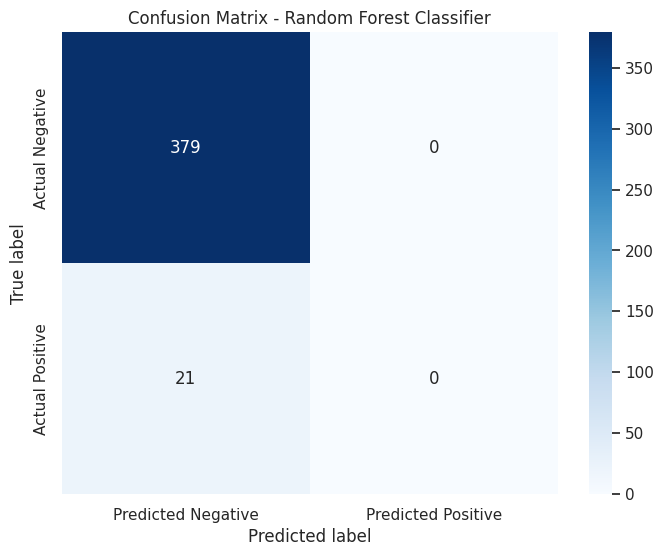

In [119]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_clf, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [120]:
print(classification_report(y_test, y_pred_clf, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400



Cross validation score

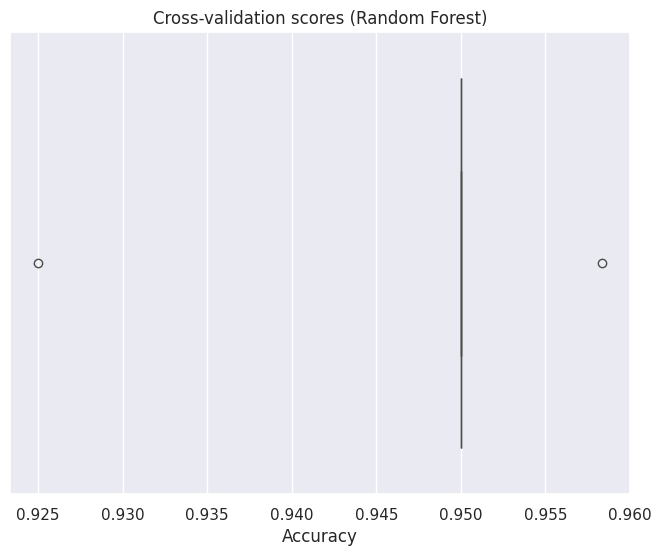

In [121]:
from sklearn.model_selection import KFold
# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy (in this case, k-fold cross-validation)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Plot boxplot of cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title("Cross-validation scores (Random Forest)")
plt.xlabel("Accuracy")
plt.show()

## Random Forest with hyperparameters fine-tuning

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Classifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Create the SMOTE pipeline with Random Forest Classifier
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
])

# Perform grid search to find the best parameters
grid_search_rf = GridSearchCV(estimator=smote_pipeline, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

# Extract the best hyperparameters for the Random Forest Classifier
best_rf_params = {
    'n_estimators': best_params_rf['classifier__n_estimators'],
    'max_depth': best_params_rf['classifier__max_depth'],
    'min_samples_split': best_params_rf['classifier__min_samples_split'],
    'min_samples_leaf': best_params_rf['classifier__min_samples_leaf']
}

# Train the Random Forest Classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_rf_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.5666666666666667
Accuracy: 0.9475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

Confusion Matrix:
[[379   0]
 [ 21   0]]


Both of the Random Forest models with and without hyperparameters tuning provides same results. finetuning hyperparameters with grid search method is not provding any improvements.

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

The best parameters for the Random Forest Classifier indicate a maximum depth of 10, minimum samples per leaf of 1, minimum samples for split of 2, and 200 estimators.
Best Score: 0.5666666666666667

The best score achieved during the grid search process is approximately 0.5667, which represents the accuracy metric.
Accuracy: 0.9475

The overall accuracy of the model on the test set is 0.9475, indicating that it correctly predicts the majority class (0.0) most of the time.

Classification Report:

Precision for class 0.0 is 0.95, indicating a high proportion of true positives among predicted positives for this class.
Recall for class 0.0 is 1.00, indicating that the model captures all true positives for this class.
F1-score for class 0.0 is 0.97, which is a harmonic mean of precision and recall, reflecting a good balance between them.
Precision, recall, and F1-score for class 1.0 are all 0.00, indicating poor performance in predicting the minority class (1.0).
The weighted average F1-score is 0.92, indicating overall model performance.

Confusion Matrix:

The confusion matrix shows 379 true negatives (TN), 0 false positives (FP), 21 false negatives (FN), and 0 true positives (TP).
The model correctly predicts the majority class (0.0) but fails to predict any instances of the minority class (1.0), resulting in a high number of false negatives.

## Adaboost model with default hyperparameters

In [123]:
from sklearn.ensemble import AdaBoostClassifier

# Training a classifier on the selected features
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
# Evaluating the classifier
accuracy_adaboost = adaboost_model.score(X_test, y_test)

# Generate confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print("Randon Forest Classifier Accuracy:", accuracy_adaboost)
print("Confusion Matrix:\n", conf_matrix_adaboost)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))

Randon Forest Classifier Accuracy: 0.9475
Confusion Matrix:
 [[379   0]
 [ 21   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400



## Adaboost model with hyperparameters fine-tuning with Grid Search

In [124]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the SMOTE pipeline with AdaBoost Classifier
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('adaboost', AdaBoostClassifier())
])

# Define the parameter grid for AdaBoost Classifier
param_grid_adaboost = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search to find the best parameters
grid_search_adaboost = GridSearchCV(estimator=smote_pipeline, param_grid=param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best parameters and best score
best_params_adaboost = grid_search_adaboost.best_params_
best_score_adaboost = grid_search_adaboost.best_score_

# Extract the best base estimator, n_estimators, and learning_rate
best_base_estimator = best_params_adaboost['adaboost__estimator']
best_n_estimators = best_params_adaboost['adaboost__n_estimators']
best_learning_rate = best_params_adaboost['adaboost__learning_rate']

# Train the AdaBoost Classifier with the best parameters
best_adaboost_classifier = AdaBoostClassifier(
    estimator=best_base_estimator,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate
)
best_adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = best_adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))

# Perform cross-validation and calculate performance metrics
cv_results = cross_val_score(best_adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross Validation Score: ", cv_results)


Accuracy: 0.9475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

Confusion Matrix:
[[379   0]
 [ 21   0]]

Cross Validation Score:  [0.95       0.95       0.95       0.94166667 0.94166667]


## Adaboost Model with Randomized Search

In [125]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the SMOTE pipeline with AdaBoost Classifier
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('adaboost', AdaBoostClassifier())
])

# Define the parameter grid for RandomizedSearchCV
param_dist_adaboost = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Perform RandomizedSearchCV to find the best parameters
random_search_adaboost = RandomizedSearchCV(
    estimator=smote_pipeline,
    param_distributions=param_dist_adaboost,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV
random_search_adaboost.fit(X_train, y_train)

# Get the best parameters and best score
best_params_adaboost = random_search_adaboost.best_params_
best_score_adaboost = random_search_adaboost.best_score_

# Extract the best base estimator, n_estimators, and learning_rate
best_base_estimator = best_params_adaboost['adaboost__estimator']
best_n_estimators = best_params_adaboost['adaboost__n_estimators']
best_learning_rate = best_params_adaboost['adaboost__learning_rate']

# Train the AdaBoost Classifier with the best parameters
best_adaboost_classifier = AdaBoostClassifier(
    estimator=best_base_estimator,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate
)
best_adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = best_adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))

# Perform cross-validation and calculate performance metrics
cv_results = cross_val_score(best_adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross Validation Score: ", cv_results)


Accuracy: 0.9475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       379
         1.0       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

Confusion Matrix:
[[379   0]
 [ 21   0]]

Cross Validation Score:  [0.95       0.95       0.95       0.94166667 0.94166667]


All the 3 Adaboost models (with default hyperparameters, with Grid Search and Random Search) are providing same results. finetuning hyperparameters are showing any improvements.

Accuracy: The model achieved an accuracy of 94.75%, indicating that it correctly classified the majority class (class 0) most of the time. However, it performed poorly on the minority class (class 1).

Precision and Recall: For class 0, the precision and recall are both 0.95 and 1.00, respectively, which means that the model correctly identified almost all instances of class 0 but failed to detect any instances of class 1. For class 1, both precision and recall are 0.00, indicating that the model did not correctly identify any instances of class 1.

F1-score: The F1-score for class 0 is 0.97, which is high due to the high precision and recall values. However, the F1-score for class 1 is 0.00, indicating poor performance in classifying class 1 instances.

Confusion Matrix: The confusion matrix shows that the model correctly predicted all instances of class 0 (379 out of 379), but it failed to predict any instances of class 1 (0 out of 21).

Cross Validation Score: The cross-validation scores are consistent across folds, ranging from 0.9417 to 0.95, indicating that the model's performance is stable.

Overall, while the model performed well in classifying the majority class, it struggled with the minority class, leading to low precision, recall, and F1-score for class 1. This suggests that the model may be biased towards the majority class and requires further tuning or sampling techniques to improve its performance on the minority class.

# Recommnded Model:
After fine-tuning hyperparameters, the Logistic Regression model demonstrated significant improvement compared to other machine learning models. This makes Logistic Regression the preferred choice, especially considering the dataset's imbalance. Some models, despite hyperparameter tuning, still struggled to accurately predict fraudulent cases.

Here are few more insights why Logistic regrssion model is more suitable model for imbalace dataset,

**Implicit Class Weighting**: Logistic Regression naturally adjusts its decision boundary based on class distributions, giving more weight to the minority class. This helps in handling imbalanced data by ensuring that the model focuses on correctly classifying the rare class.

**Probability Estimation**: Logistic Regression provides probability estimates for each class, making it easier to interpret and set classification thresholds. This flexibility is valuable when dealing with imbalanced datasets, as it allows for tuning the decision threshold to optimize performance metrics like precision, recall, or F1-score.

**Less Susceptible to Overfitting**: Logistic Regression is generally less prone to overfitting, which can be a concern when dealing with imbalanced datasets. It tends to generalize well and avoid learning from noise in the data, leading to more robust predictions on unseen data.

**Interpretability**: Logistic Regression provides interpretable coefficients for each feature, allowing analysts to understand the impact of each predictor variable on the target variable. This transparency is beneficial in explaining model predictions and gaining insights into the underlying data patterns, especially in imbalanced datasets where feature importance is crucial.